In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "2018_P1.csv"  # Update file name if needed

# Load the CSV and force correct encoding
df = pd.read_csv(file_path)

# Print all column names
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']


In [ ]:
print(df.isnull().sum())

Timestamp                 0
PM2.5 (µg/m³)           915
PM10 (µg/m³)            918
NO (µg/m³)             1809
NO2 (µg/m³)            1814
NOx (ppb)              1840
NH3 (µg/m³)            1844
SO2 (µg/m³)            1209
CO (mg/m³)             1170
Ozone (µg/m³)          2300
Benzene (µg/m³)        1093
Toluene (µg/m³)        1082
Xylene (µg/m³)         8760
O Xylene (µg/m³)       8760
Eth-Benzene (µg/m³)    4691
MP-Xylene (µg/m³)      3625
AT (°C)                8760
RH (%)                  825
WS (m/s)               1014
WD (deg)               1010
RF (mm)                8760
TOT-RF (mm)            8760
SR (W/mt2)              916
BP (mmHg)               821
VWS (m/s)               813
dtype: int64


In [ ]:
import missingno as msno

<Axes: >

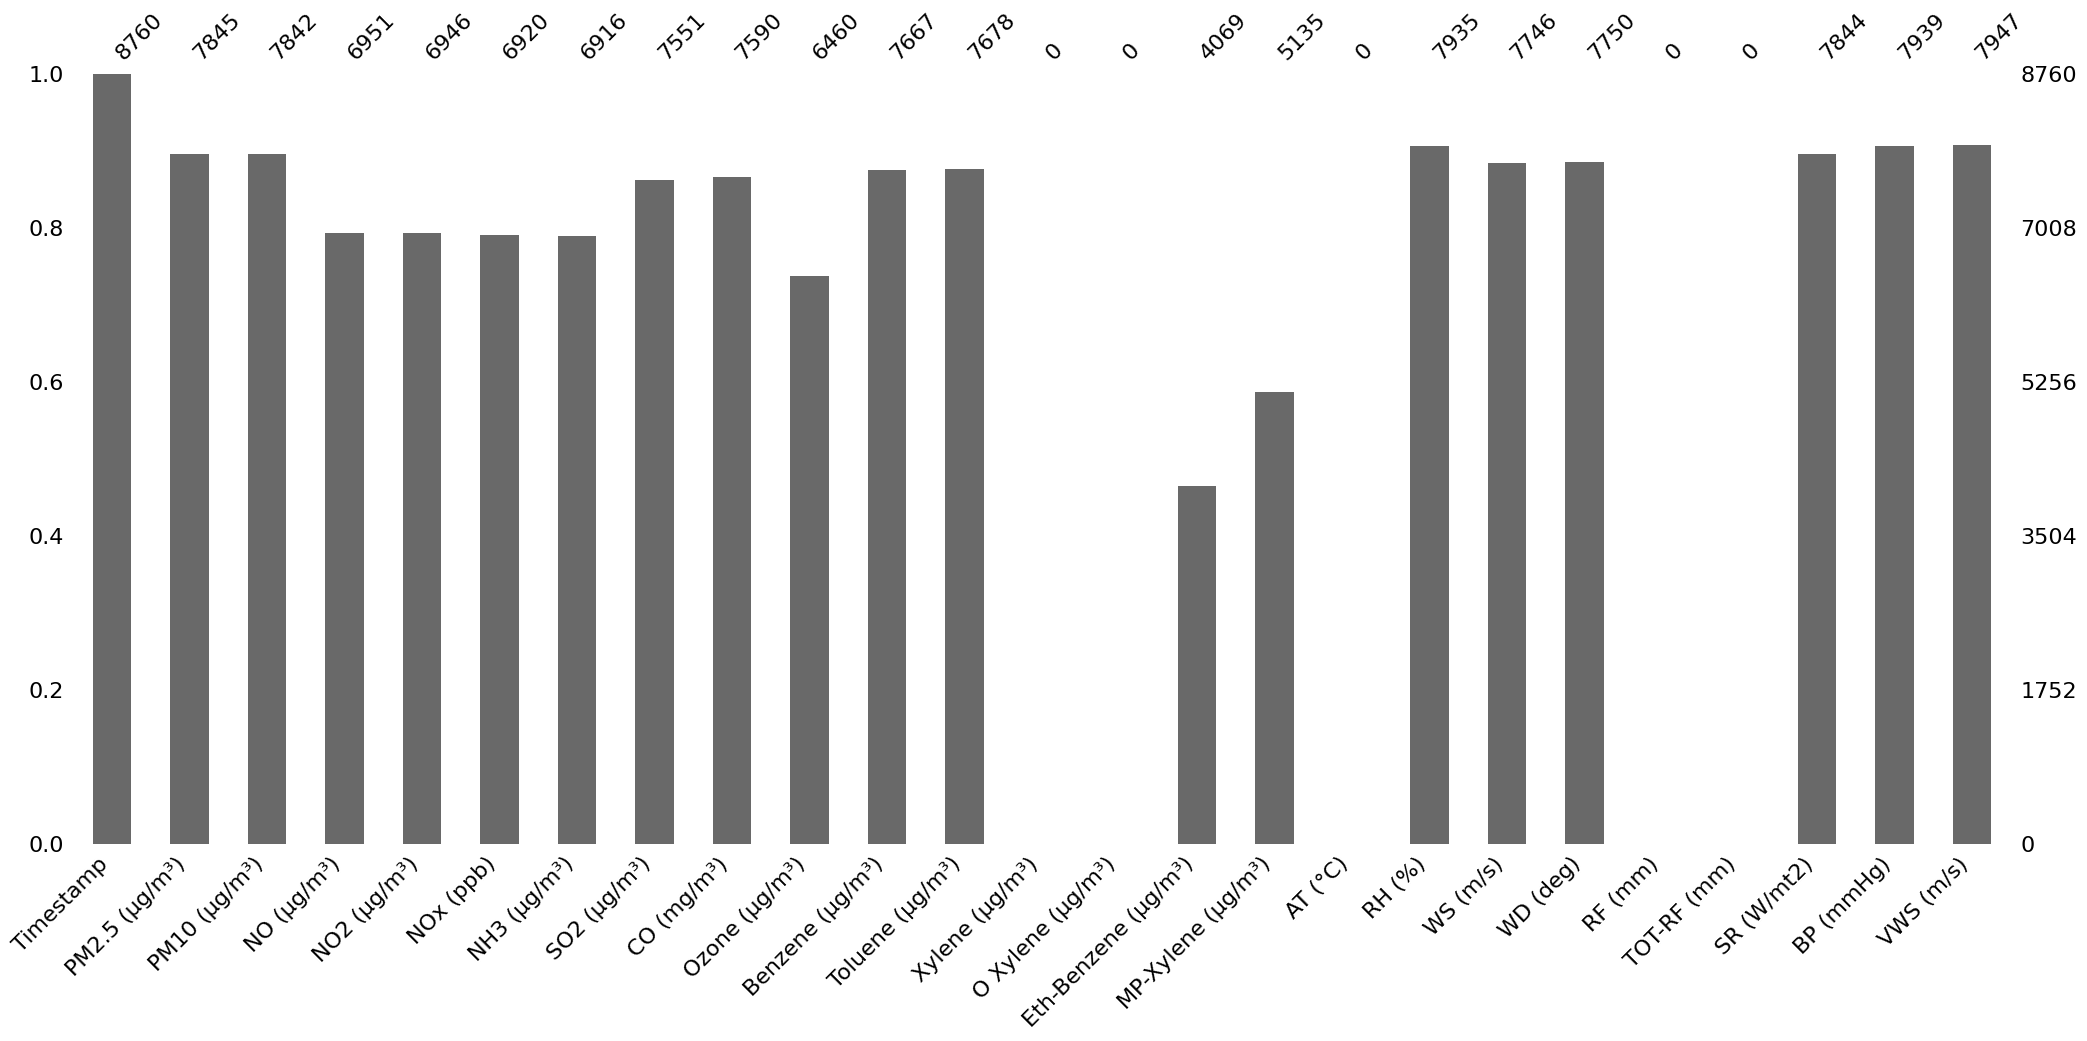

In [ ]:
msno.bar(df)

In [ ]:
columns_to_keep =  ['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)',
                  'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)',
                  'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']

# Select columns
df1 = df[columns_to_keep].copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      8760 non-null   object 
 1   PM2.5 (µg/m³)  7845 non-null   float64
 2   PM10 (µg/m³)   7842 non-null   float64
 3   NO2 (µg/m³)    6946 non-null   float64
 4   NH3 (µg/m³)    6916 non-null   float64
 5   SO2 (µg/m³)    7551 non-null   float64
 6   CO (mg/m³)     7590 non-null   float64
 7   Ozone (µg/m³)  6460 non-null   float64
 8   AT (°C)        0 non-null      float64
 9   RH (%)         7935 non-null   float64
 10  WS (m/s)       7746 non-null   float64
 11  WD (deg)       7750 non-null   float64
 12  SR (W/mt2)     7844 non-null   float64
 13  BP (mmHg)      7939 non-null   float64
dtypes: float64(13), object(1)
memory usage: 958.3+ KB


In [ ]:
# Count the number of rows where all columns have NaN values
missing_rows_count = df[df.isnull().all(axis=1)].shape[0]

print(f"Total number of rows with all missing values: {missing_rows_count}")


Total number of rows with all missing values: 0


In [ ]:
#Replacing missing values with mean
for col in df1.columns:
  if col != 'Timestamp' and df1[col].isnull().any():
    col_mean = df1[col].mean()
    df1[col] = df1[col].fillna(col_mean)
    print(f"Filled missing values in {col}")

Filled missing values in PM2.5 (µg/m³)
Filled missing values in PM10 (µg/m³)
Filled missing values in NO2 (µg/m³)
Filled missing values in NH3 (µg/m³)
Filled missing values in SO2 (µg/m³)
Filled missing values in CO (mg/m³)
Filled missing values in Ozone (µg/m³)
Filled missing values in AT (°C)
Filled missing values in RH (%)
Filled missing values in WS (m/s)
Filled missing values in WD (deg)
Filled missing values in SR (W/mt2)
Filled missing values in BP (mmHg)


In [ ]:
rows_before = len(df1)
df1 = df1.dropna()
rows_after = len(df1)
rows_dropped = rows_before - rows_after
print(f"Dropped {rows_dropped} rows with missing values.")

Dropped 8760 rows with missing values.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      0 non-null      object 
 1   PM2.5 (µg/m³)  0 non-null      float64
 2   PM10 (µg/m³)   0 non-null      float64
 3   NO2 (µg/m³)    0 non-null      float64
 4   NH3 (µg/m³)    0 non-null      float64
 5   SO2 (µg/m³)    0 non-null      float64
 6   CO (mg/m³)     0 non-null      float64
 7   Ozone (µg/m³)  0 non-null      float64
 8   AT (°C)        0 non-null      float64
 9   RH (%)         0 non-null      float64
 10  WS (m/s)       0 non-null      float64
 11  WD (deg)       0 non-null      float64
 12  SR (W/mt2)     0 non-null      float64
 13  BP (mmHg)      0 non-null      float64
dtypes: float64(13), object(1)
memory usage: 0.0+ bytes


In [ ]:
df1.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg)
0,01-01-2018 00:00,133.250000,154.880000,68.210000,19.01000,7.700000,0.300000,0.070000,NaN,60.790000,0.875307,162.611039,134.080000,750.000000
1,01-01-2018 01:00,151.150000,170.950000,110.920000,22.56000,8.050000,0.530000,0.020000,NaN,58.020000,0.875307,162.611039,133.500000,750.000000
2,01-01-2018 02:00,184.800000,220.100000,123.610000,23.87000,8.640000,0.380000,0.090000,NaN,55.160000,0.875307,162.611039,141.030000,750.030000
3,01-01-2018 03:00,75.285755,147.959189,42.160366,16.67819,11.750883,0.944867,42.181954,NaN,40.769002,0.875307,162.611039,188.241395,757.111227
4,01-01-2018 04:00,75.285755,147.959189,42.160366,16.67819,11.750883,0.944867,42.181954,NaN,40.769002,0.875307,162.611039,188.241395,757.111227


In [ ]:
print("\n Creating correlation matrix")
df_numeric = df1.select_dtypes(include=["number"])
correlation_matrix = df_numeric.corr()


 Creating correlation matrix


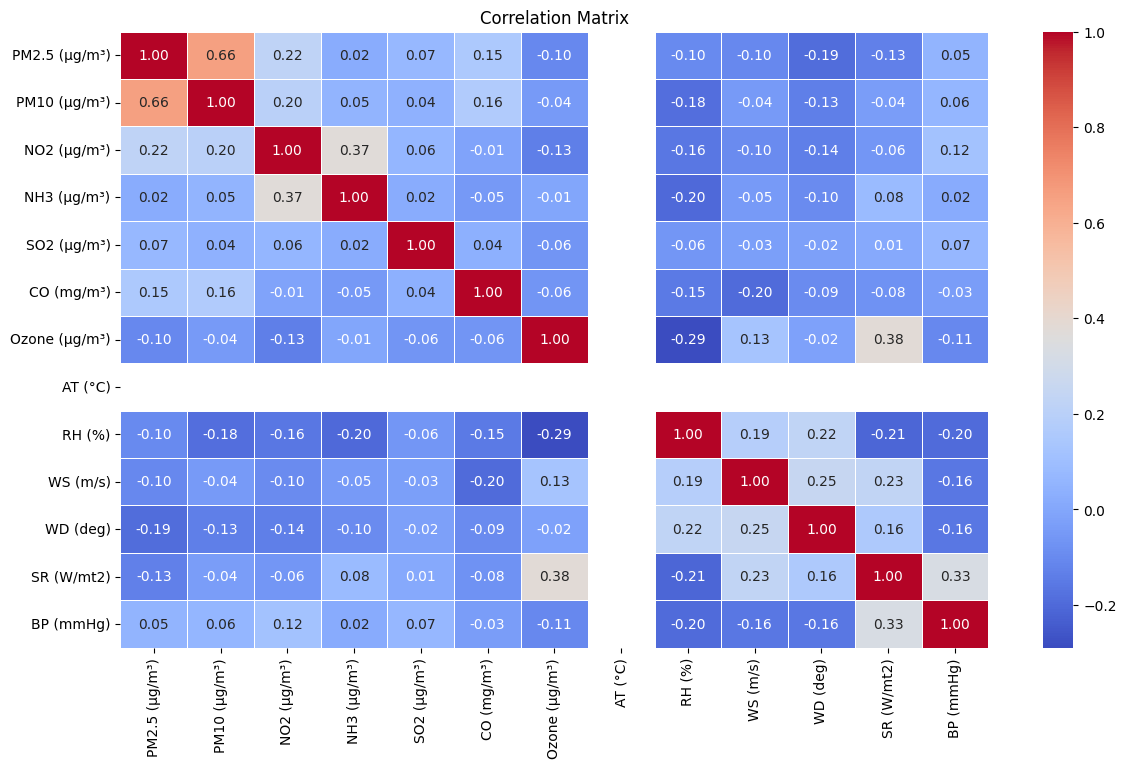

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Show top correlations
print("Top 10 Strongest Correlations:")
correlations = correlation_matrix.unstack()
sorted_correlations = correlations[correlations != 1.0].abs().sort_values(ascending=False)
print(sorted_correlations[:10])

Top 10 Strongest Correlations:
PM2.5 (µg/m³)  PM10 (µg/m³)     0.657101
PM10 (µg/m³)   PM2.5 (µg/m³)    0.657101
SR (W/mt2)     Ozone (µg/m³)    0.375699
Ozone (µg/m³)  SR (W/mt2)       0.375699
NH3 (µg/m³)    NO2 (µg/m³)      0.371143
NO2 (µg/m³)    NH3 (µg/m³)      0.371143
SR (W/mt2)     BP (mmHg)        0.325868
BP (mmHg)      SR (W/mt2)       0.325868
RH (%)         Ozone (µg/m³)    0.289353
Ozone (µg/m³)  RH (%)           0.289353
dtype: float64
